In [32]:
# Libs
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pwd = os.getcwd()
dataset = pd.read_csv(pwd + r"\Data\Data - Jadaero Parts Edited.csv")


In [139]:
# This Viz answer the questions from stakeholder, Look '\JadAerospace\Stakeholder.md'

In [37]:
risk_level = dataset[dataset['Risk Level'] != 'Unknown']['Risk Level']
risk_level = risk_level.value_counts()

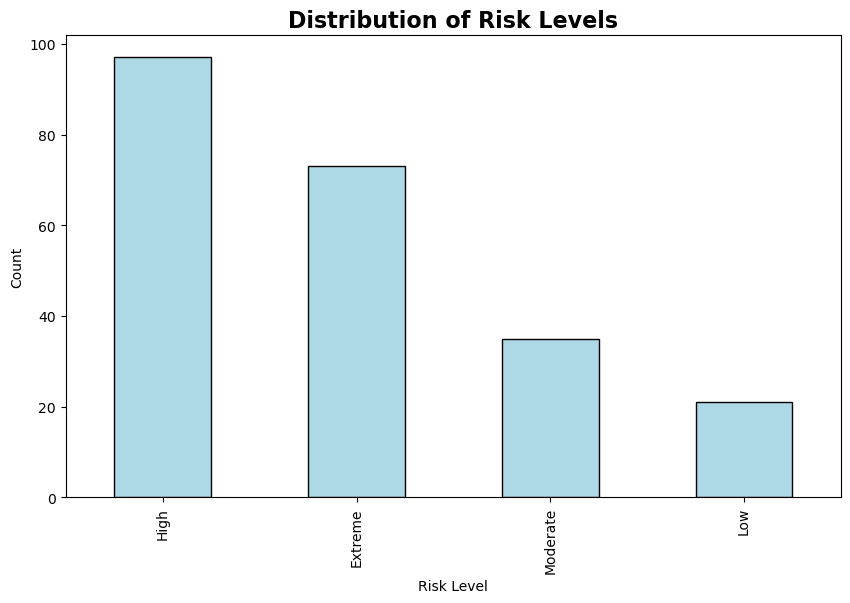

In [91]:

risk_level.plot(kind='bar', xlabel="Risk Level", ylabel="Count", color='lightblue', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Risk Levels', fontsize=16, fontweight='bold')
plt.show()

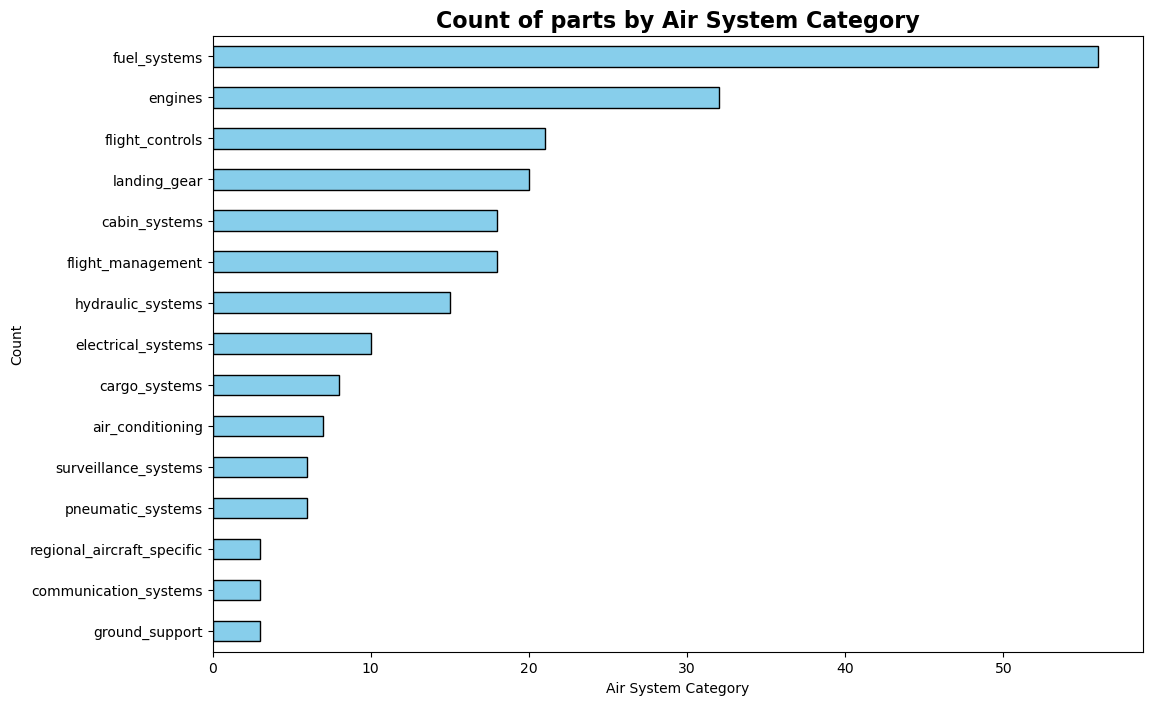

In [90]:

airsystem = dataset[dataset['Air System Category'] != 'other']['Air System Category'].value_counts()

airsystem[::-1].plot(kind='barh', xlabel="Air System Category", ylabel="Count", color='skyblue', edgecolor='black', figsize=(12, 8))
plt.title('Count of parts by Air System Category', fontsize=16, fontweight='bold')
plt.show()


In [60]:
dataset['Geographical Targets'].unique()

array(['High-frequency routes (US domestic, Europe-Middle East), Harsh environments (desert, coastal) + long-haul operations, High-cycle operations + harsh environments',
       'Hot climates + cargo temperature-sensitive operations, High-altitude routes + extreme temperature operations, Long-haul operations',
       nan,
       'High-passenger-turnover routes + wear-intensive operations, Long-haul operations + passenger comfort, High-frequency routes (US domestic, Europe-Middle East)',
       'Harsh environments (desert, coastal) + long-haul operations, High-altitude routes + extreme temperature operations, Weather-intensive routes',
       'Harsh environments (desert, coastal) + long-haul operations, High-altitude routes + extreme temperature operations, Safety-critical universal demand + harsh environments',
       'High-frequency routes (US domestic, Europe-Middle East), High-cycle operations + temperature extremes, Harsh environments (desert, coastal) + long-haul operations',
    

Long-haul       192
US Domestic     101
Europe          101
Middle East     101
Desert/Harsh     90
Coastal          90
Name: count, dtype: int64


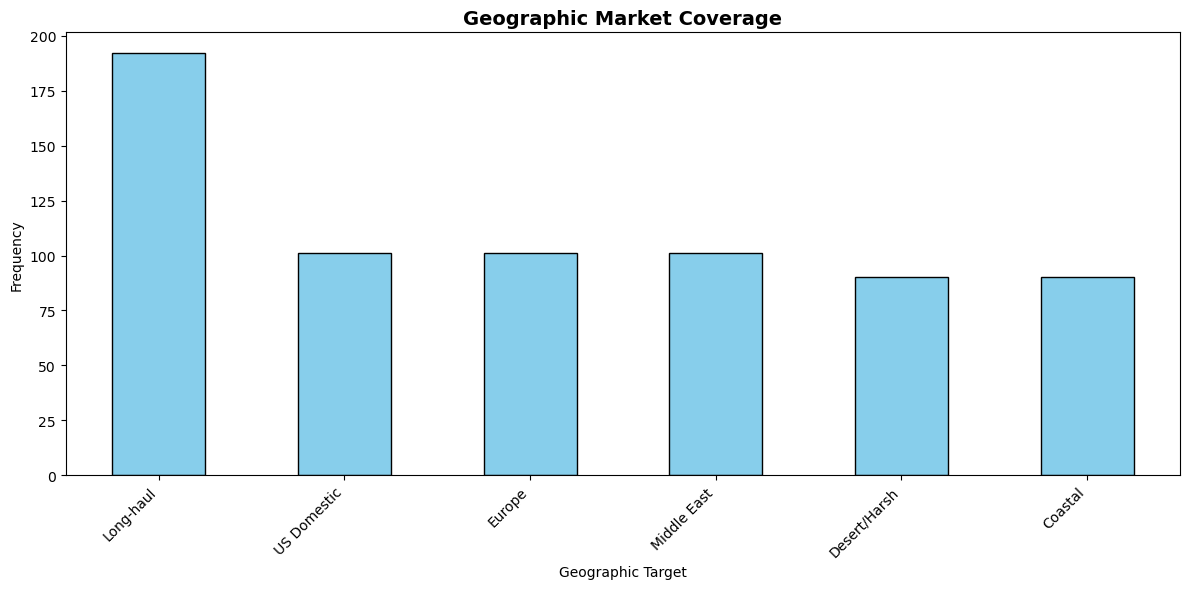

In [73]:
# Geographic Market Coverage - Bar Chart
geo_keywords = []

# Loop through each entry and check for keywords by AI
for geo_target in dataset['Geographical Targets']:
    geo_target = str(geo_target).lower()
    if 'us domestic' in geo_target:
        geo_keywords.append('US Domestic')
    if 'europe' in geo_target:
        geo_keywords.append('Europe')
    if 'middle east' in geo_target:
        geo_keywords.append('Middle East')
    if 'desert' in geo_target:
        geo_keywords.append('Desert/Harsh')
    if 'coastal' in geo_target:
        geo_keywords.append('Coastal')
    if 'long-haul' in geo_target:
        geo_keywords.append('Long-haul')

# Use pandas for counting
geo_counts = pd.Series(geo_keywords).value_counts()

# Plotting
geo_counts.plot(kind='bar', edgecolor='black', color='skyblue', figsize=(12, 6))

plt.title('Geographic Market Coverage', fontsize=14, fontweight='bold')
plt.xlabel('Geographic Target')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
print(geo_counts)
plt.tight_layout()
plt.show()


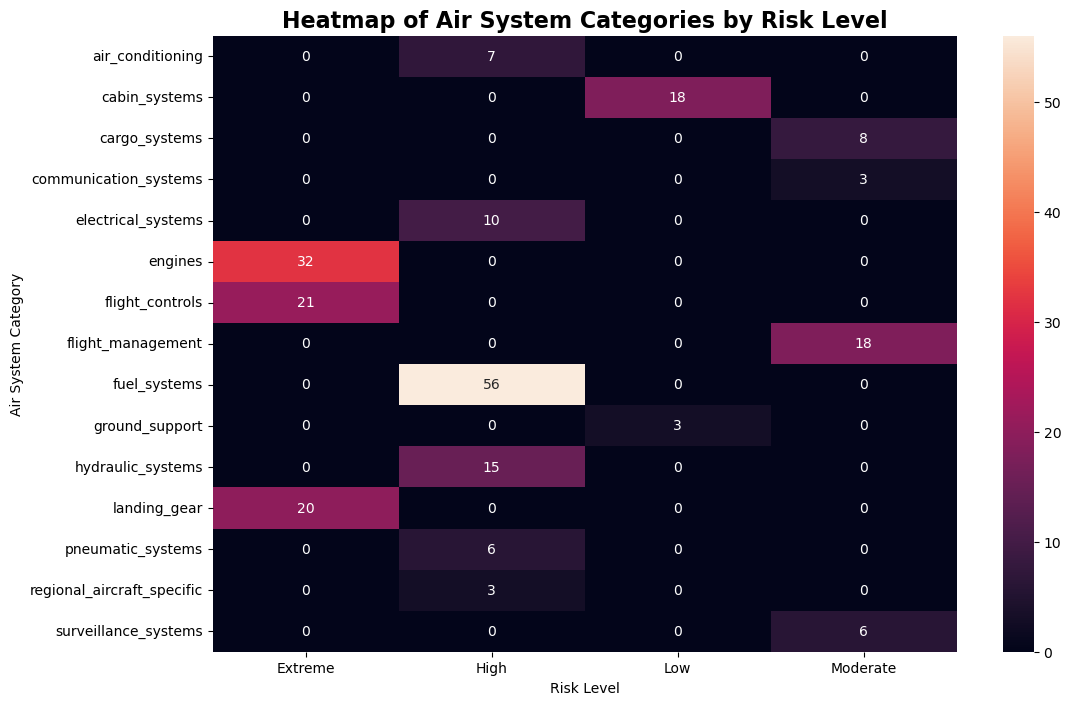

In [85]:
# HEATMAP CHART


# INSTEAD OF USING VALUES COUNTS USE CROSSTAB  TO COUNT AND COMBINE FOR HEATMAP

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

filtered_data = dataset[(dataset['Air System Category'] != 'other') & (dataset['Risk Level'] != 'Unknown')]

sns.heatmap(pd.crosstab(filtered_data['Air System Category'], filtered_data['Risk Level']), annot=True, fmt='d')
plt.title('Heatmap of Air System Categories by Risk Level', fontsize=16, fontweight='bold')
plt.xlabel('Risk Level')
plt.ylabel('Air System Category')
plt.show()
# VISUALIZE OF THE HIGH RISK DAMAGE CATEGORIES

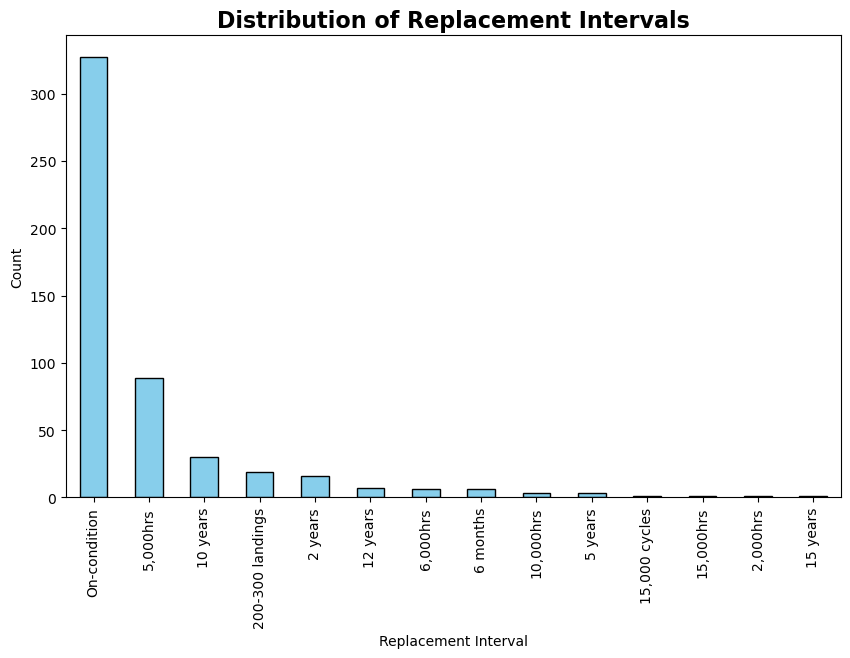

In [102]:
# Geographic Market Coverage - Bar Chart
interval_keywords = []

for interval in dataset['Replacement Interval']:
    interval = str(interval).lower()
    if 'on-condition' in interval:
        interval_keywords.append('On-condition')
    if '12 years' in interval:
        interval_keywords.append('12 years')
    if '15 years' in interval:
        interval_keywords.append('15 years')
    if '2,000hrs' in interval:
        interval_keywords.append('2,000hrs')
    if '10 years' in interval:
        interval_keywords.append('10 years')
    if '5,000hrs' in interval:
        interval_keywords.append('5,000hrs')
    if '6 months' in interval:
        interval_keywords.append('6 months')
    if '6,000hrs' in interval:
        interval_keywords.append('6,000hrs')
    if '15,000hrs' in interval:
        interval_keywords.append('15,000hrs')
    if '15,000 cycles' in interval:
        interval_keywords.append('15,000 cycles')
    if '200-300 landings' in interval:
        interval_keywords.append('200-300 landings')
    if '5 years' in interval:
        interval_keywords.append('5 years')
    if '2 years' in interval:
        interval_keywords.append('2 years')
    if '10,000hrs' in interval:
        interval_keywords.append('10,000hrs')

# Use pandas for counting
interval_counts = pd.Series(interval_keywords).value_counts()
interval_counts.plot(kind='bar', xlabel="Replacement Interval", ylabel="Count", color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Replacement Intervals', fontsize=16, fontweight='bold')
plt.show()

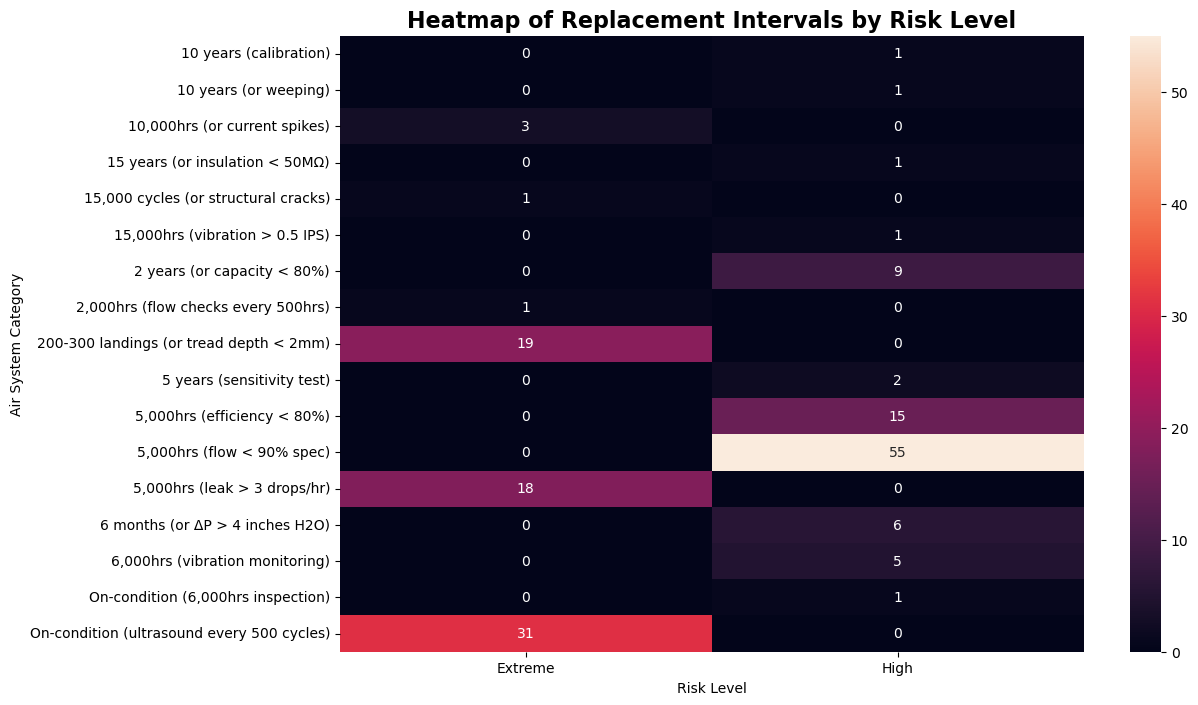

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

filtered_data = dataset[~dataset['Risk Level'].isin(['Unknown','Low','Moderate'])]

sns.heatmap(pd.crosstab(dataset['Replacement Interval'], filtered_data['Risk Level']), annot=True, fmt='d')
plt.title('Heatmap of Replacement Intervals by Risk Level', fontsize=16, fontweight='bold')
plt.xlabel('Risk Level')
plt.ylabel('Air System Category')
plt.show()

In [135]:
print(interval_counts)

On-condition        327
5,000hrs             89
10 years             30
200-300 landings     19
2 years              16
12 years              7
6,000hrs              6
6 months              6
10,000hrs             3
5 years               3
15,000 cycles         1
15,000hrs             1
2,000hrs              1
15 years              1
Name: count, dtype: int64
